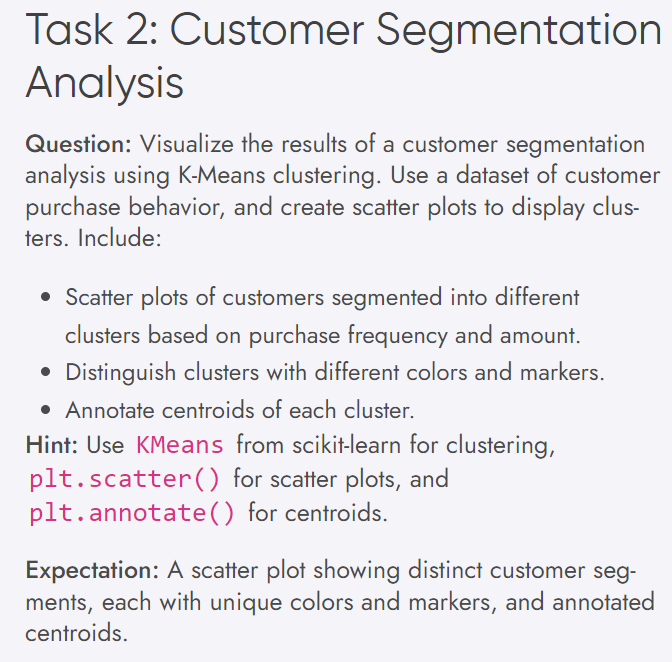

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

# Select the relevant features for clustering (e.g., Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
# Get the centroids
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


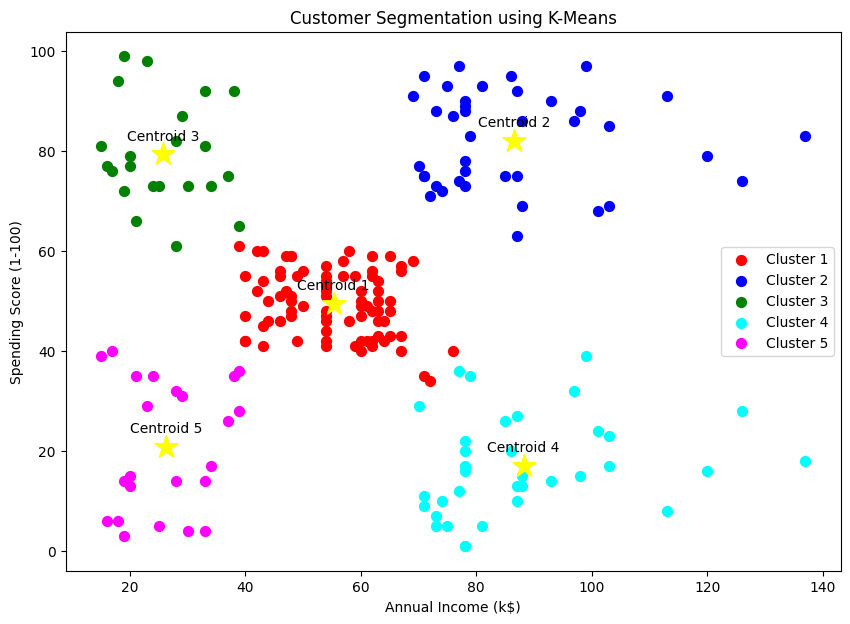

In [8]:
# Plot the clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X.values[data['Cluster'] == i, 0], X.values[data['Cluster'] == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Annotate centroids
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, s=300, c='yellow', marker='*')
    plt.annotate(f'Centroid {idx+1}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0,10), ha='center')

# Labeling the plot
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

